## Weather Classification

In [1]:
# Import Necessary Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

### Data Preparation and Exploration

In [2]:
# Step 1: Import the data from the "weather_data.csv" file
df = pd.read_csv("weather_classification_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to understand its structure.
df.head()

(13200, 11)


,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


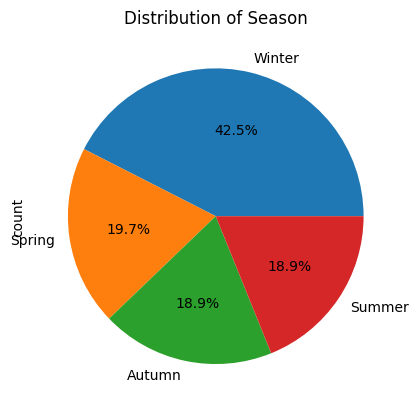

In [3]:
# Step 4: Visualize the distribution of key features

# Visualize season using a pie chart
df['season'].value_counts().plot(kind = 'pie', title = 'Distribution of Season', autopct = '%1.1f%%')
plt.show()

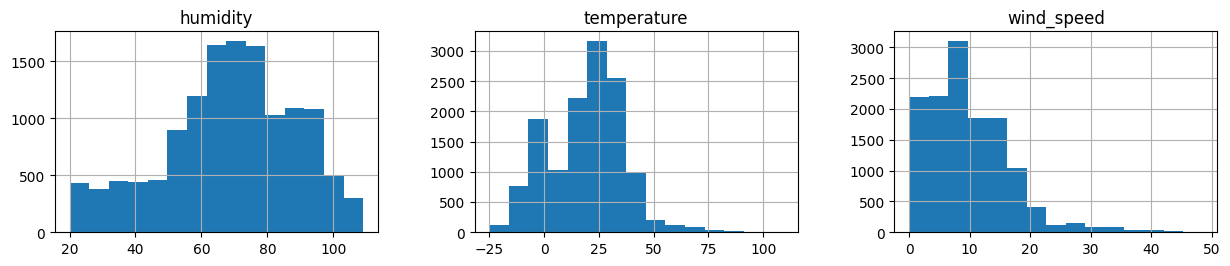

In [4]:
# Visualize temperature, humidity, and wind_speed using histograms
df[['humidity', 'temperature', 'wind_speed']].hist(bins = 15, figsize=(15, 6), layout = (2, 3))
plt.show()

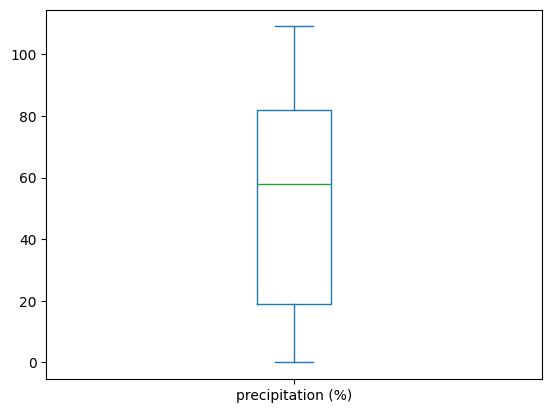

In [5]:
# Visualize precipitation (%) using a box plot
df['precipitation (%)'].plot(kind = 'box')
plt.show()

### Data Transformation

In [6]:
# Step 1: Encode cloud_cover, location and season using one-hot encoding.
df = pd.get_dummies(df, columns=['cloud_cover', 'location', 'season'], drop_first=True)

In [7]:
# Step 2: Scale the numerical features
scaler = StandardScaler()
numerical_features = ['temperature', 'humidity', 'wind_speed', 'precipitation (%)', 'atmospheric_pressure', 'uv_index', 'visibility (km)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [8]:
# Step3: Display the first few rows of the updated dataset.
df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,False,False,True,True,False,False,False,True
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,False,False,True,True,False,True,False,False
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,False,False,False,False,True,True,False,False
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,False,False,False,False,False,True,False,False
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,Rainy,False,True,False,False,True,False,False,True


### Model Training Using SVM with Linear Kernel

In [9]:
# Step 1: Select features and target variable
X = df.drop('weather_type', axis = 1)
y = df['weather_type']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
# Step 3: Train SVM with linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Step 4: Print accuracy score
print("Model Accuracy:", model.score(X_test, y_test))


Model Accuracy: 0.8845959595959596


In [11]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)

#classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.86      0.84      0.85       955
       Rainy       0.87      0.87      0.87       982
       Snowy       0.88      0.94      0.91      1033
       Sunny       0.92      0.88      0.90       990

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960

Confusion Matrix:
[[806  82  28  39]
 [ 49 852  67  14]
 [ 26  12 974  21]
 [ 57  29  33 871]]


### Model Training Using SVM with RBF Kernel

In [12]:
# Step 1: Train SVM with RBF kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)


# Step 2: Print accuracy score
print("Model Accuracy:", model_rbf.score(X_test, y_test))


# Step 3: Evaluate the model
y_pred_rbf = model_rbf.predict(X_test)

#classification report
report = classification_report(y_test, y_pred_rbf)
print("Classification Report:")
print(report)

#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))

Model Accuracy: 0.9055555555555556
Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       955
       Rainy       0.89      0.91      0.90       982
       Snowy       0.94      0.94      0.94      1033
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

Confusion Matrix:
[[843  64  24  24]
 [ 54 891  13  24]
 [ 30  14 968  21]
 [ 48  28  30 884]]


### Experiment with Hyperparameters in SVM

In [13]:
# Step 1: Train the SVM model with specified hyperparameters
model_rbf = SVC(kernel='rbf', gamma='auto', C=0.5, degree=2)
model_rbf.fit(X_train, y_train)


# Step 2: Print accuracy score
print("Model Accuracy:", model_rbf.score(X_test, y_test))


# Step 3: Evaluate the model
y_pred_rbf = model_rbf.predict(X_test)

#classification report
report = classification_report(y_test, y_pred_rbf)
print("Classification Report:")
print(report)

#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))

Model Accuracy: 0.898989898989899
Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       955
       Rainy       0.90      0.90      0.90       982
       Snowy       0.90      0.94      0.92      1033
       Sunny       0.93      0.88      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

Confusion Matrix:
[[833  62  36  24]
 [ 50 882  31  19]
 [ 29  10 973  21]
 [ 46  30  42 872]]


### Implementing Sklearn Pipeline

In [14]:
# Create a pipeline with two steps: scaling and SVM with RBF kernel
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel = 'rbf'))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions using the pipeline on the test data
y_pred_pipeline = pipeline.predict(X_test)

# Print the classification report for the pipeline model
print(classification_report(y_test, y_pred_pipeline))

# Print the confusion matrix for the pipeline model
print(confusion_matrix(y_test, y_pred_pipeline))

              precision    recall  f1-score   support

      Cloudy       0.87      0.88      0.87       955
       Rainy       0.89      0.91      0.90       982
       Snowy       0.92      0.94      0.93      1033
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

[[836  64  29  26]
 [ 47 892  22  21]
 [ 30  16 971  16]
 [ 52  27  29 882]]
